In [2]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
dataset=pd.read_csv("bike_sharing.csv")
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
dataset.shape

(17379, 17)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
#check dataset values null or not
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
#check duplicate values in dataset
dataset.duplicated().sum()

0

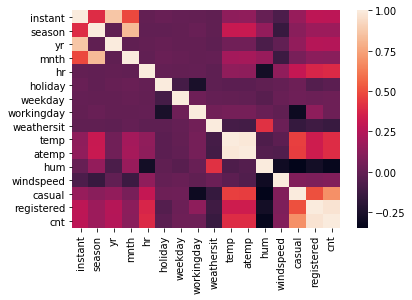

In [9]:
corr=dataset.corr()
sb.heatmap(corr)

In [10]:
# checks correlation with all columns
print(corr['cnt'].sort_values(ascending=False)[:])

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64


In [11]:
dataset1 = dataset[['temp','cnt']]

# dataset.shape

In [12]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
temp    17379 non-null float64
cnt     17379 non-null int64
dtypes: float64(1), int64(1)
memory usage: 271.6 KB


In [13]:
# split data into train and test
train,test=train_test_split(dataset1,test_size=0.3)

In [14]:
#shape of train,test data
dataset1.shape,train.shape,test.shape

((17379, 2), (12165, 2), (5214, 2))

In [15]:
#convert test data into test.csv file
test.to_csv("test.csv",index=False,encoding='utf-8')

In [16]:
#split train data into train_data and cross validation
train_data,cv_data=train_test_split(train,test_size=0.3)

In [17]:
train_data.shape,cv_data.shape

((8515, 2), (3650, 2))

In [18]:
x_train=train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values

In [19]:
x_train.shape,y_train.shape

((8515, 1), (8515,))

In [20]:
#feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

print(x_train)

[[-0.60984352]
 [-1.23340566]
 [-0.71377055]
 ...
 [-1.12947864]
 [ 0.94906181]
 [-0.71377055]]


In [22]:
#separate the cv_data into x_cv and y_cv
x_cv=cv_data.iloc[:,:-1].values
y_cv=cv_data.iloc[:,1].values

In [23]:
y_cv

array([322,  17,  20, ..., 179,  32,  12])

In [24]:
x_cv.shape,y_cv.shape

((3650, 1), (3650,))

In [25]:
x_cv=sc.transform(x_cv)
print(x_cv)

[[ 0.01371861]
 [ 0.22157266]
 [-1.4412597 ]
 ...
 [ 1.05298884]
 [ 0.01371861]
 [ 0.11764563]]


In [26]:
# #create object of class and then fit x_train,y_train data using regressor object
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#predicating the train dataset
y_predict=regressor.predict(x_train)
dataset.head(5)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [28]:
# getting predictions on cross validation dataset
y_pred = regressor.predict(x_cv)
dataset.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [29]:
# sklearn.metrics.accuracy_score(y_test,y_pred)

acc_train=sklearn.metrics.median_absolute_error(y_train,y_predict)
print("Accuracy of train data =",acc_train)

acc_test=sklearn.metrics.median_absolute_error(y_cv,y_pred)
print("Accuracy of cross data =",acc_test)


Accuracy of train data = 100.27506797433063
Accuracy of cross data = 96.96386405734562


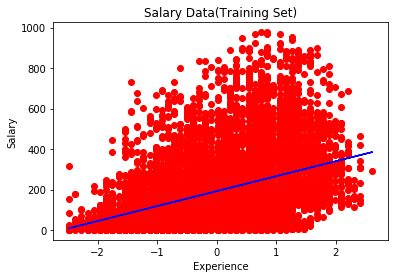

In [30]:
# visualizing the training set result
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salary Data(Training Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

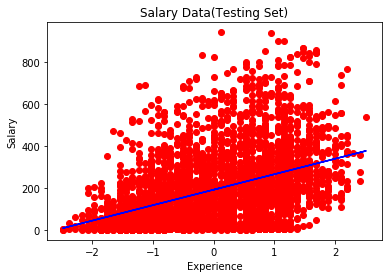

In [31]:
# visualizing the cross validation set result
plt.scatter(x_cv,y_cv,color='red')
plt.plot(x_cv,regressor.predict(x_cv),color='blue')
plt.title('Salary Data(Testing Set)')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()


In [32]:
fileObject = open("train_data.pkl",'wb')
pickle.dump(regressor,fileObject)   
# here we close the fileObject
pickle.dump(sc,fileObject)
fileObject.close()
